<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº1: Síntesis de señales
#### Luana Da Conceicao Ferreira


# Introducción

En este trabajo se busca dar los primeros pasos en la simulación de señales, aplicando conceptos básicos de análisis y procesamiento. El objetivo es comprender cómo se representan las señales y comenzar a experimentar con operaciones fundamentales como la síntesis, la modulación, el recorte y la correlación.  

Para ello, se implementaron funciones que permiten generar señales senoidales parametrizadas en amplitud, frecuencia, fase y cantidad de muestras, con el fin de utilizarlas en diferentes ejercicios. A partir de estas señales, se llevaron a cabo distintas operaciones de análisis que permiten observar cómo varían en el dominio temporal y qué efectos producen al combinarlas entre sí.  

Además, se estudiaron propiedades teóricas y prácticas como:  

- **Energía y potencia de una señal:**  

  $$
  E = \sum_{n=0}^{N-1} |x[n]|^2
  $$  

  La energía se calcula para señales de duración finita. En cambio, para señales periódicas o de duración indefinida, se trabaja con el concepto de potencia media, que se obtiene evaluando el comportamiento de la señal a lo largo del tiempo.


  En tiempo discreto, la energía se obtiene sumando los valores $|x[n]|^2$ de la señal. El resultado depende de cuántas muestras se consideren y del intervalo de observación elegido para el análisis.

- **Ortogonalidad de señales:**  

  $$
  \langle x, y \rangle = \sum_{n=0}^{N-1} x[n]\cdot y[n] = 0 \quad \text{(si son ortogonales)}
  $$  

  Esta propiedad permite verificar si dos señales no comparten información común, lo que resulta útil para el análisis y comparación de señales en ejercicios prácticos como en técnicas de modulación.

  
- **Autocorrelación y correlación cruzada:**  

  $$
  r_{xx}[n] = \sum_{k} x[k]\cdot x[n+k], 
  \qquad
  r_{xy}[n] = \sum_{k} x[k]\cdot y[n+k]
  $$  

  Estas funciones describen la similitud de una señal consigo misma o con otra en función de un retardo. Son herramientas fundamentales para detectar periodicidades, evaluar la relación entre señales y analizar el efecto de transformaciones como la modulación o el recorte.  

Es importante mencionar un primer acercamiento al **análisis espectral de señales**, en el que se relacionan las operaciones realizadas en el dominio temporal con su representación en frecuencia. De esta manera, se pueden vincular los resultados numéricos y gráficos obtenidos en las simulaciones con las propiedades teóricas estudiadas en clase.



# Análisis y desarrollo

1) Síntesis y gráficos de señales
   Se comenzó generando una señal sinusoidal de **2 kHZ**, especificando el tiempo entre muestras y el número de muestras empleadas. Luego, a partir de esta señal, se implementaron variaciones:
   
    -   Una señal **amplificada y desfazada en $\frac{\pi}{2}$**, para observar cómo cambia su amplitud y fase. 
   
    -   Una señal **modulada en amplitud** al multiplicar la original por otra senoidal de la mitad de su frecuencia.
   
    -   Una señal **recortada al 75% de su amplitud**, con el fin de analizar el efecto del recorte en su forma de onda.

    -   Una señal **cuadrada de 4 kHz**.
   
    -   Un **pulso rectangular de 10 ms**, para comparar su representación con las señales periódicas anteriores.
   
   Se calculó el timepo entre muestras, el número de muestras y para cada caso, la energía o potencia según correspondiera, lo que permitió cuantificar y comparar las distintas formas de onda.

El tiempo entre muestras es: 1e-05
El número de muestras es: 2000
La potencia de la señal original es: 0.5
La potencia de la señal amplificada y desfazada es: 2.0
La potencia de la señal modulada es: 0.24999999999999994
La potencia de la señal recortada es: 0.3707402889009133
La potencia de la señal cuadrada es: 1.0
La energia del pulso rectangular es: 1000


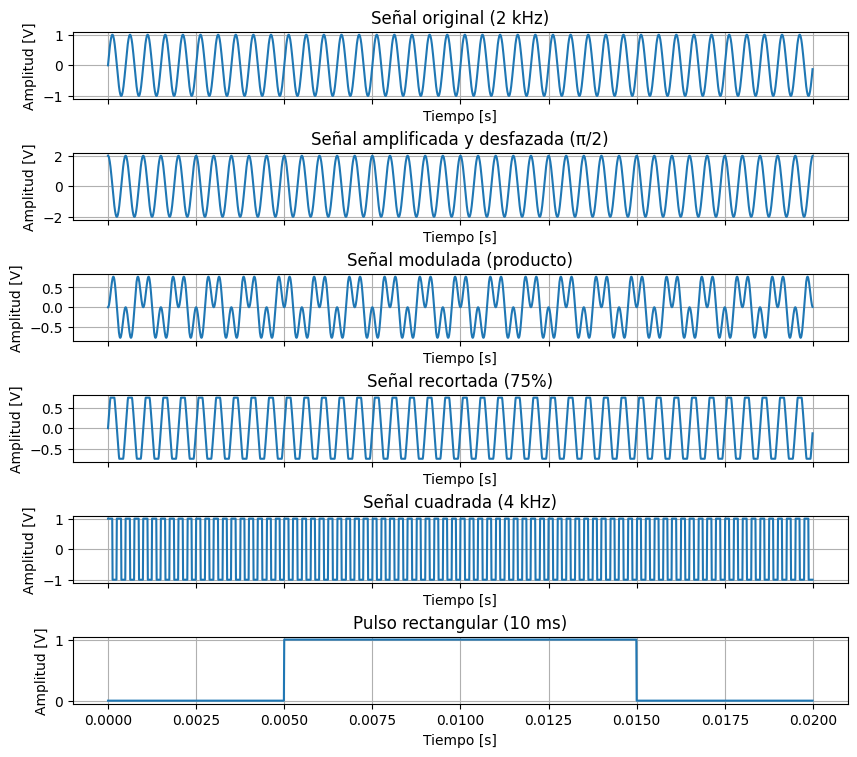

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.signal as sig
from scipy.io import wavfile

dc=0
nn=2000
fs=100000
T=nn/fs
Ts=1/fs

def sen(amp, dc, ff, ph, nn, fs):
    n = np.arange(nn)
    t = n / fs
    x = dc + amp*np.sin(2*np.pi*ff*t + ph)
    return t, x

#ITEM 1
tt, xx  = sen(1, dc, 2000, 0,          nn, fs)      # original (sen 2 kHz)
tt, aa  = sen(2, dc, 2000, np.pi/2,    nn, fs)      # portadora (2 kHz, π/2)
tt, aux = sen(1, dc, 1000, 0,          nn, fs)      # mensaje (1 kHz)

mod = xx * aux   #producto original × mensaje
rec = np.clip(xx, -0.75, 0.75) #original recortada al 75%
cc = signal.square(2*np.pi*4000*tt) #cuadrada

t0 = 0.005 #inicio
t1 = 0.015 #fin         
p = ((tt >= t0) & (tt < t1)).astype(int) #pulso de 10 ms

pxx = np.mean(xx**2) #potencia original
paa = np.mean(aa**2) #potencia amplificada y desfazada
pmod = np.mean(mod**2) #potencia modulada
prec = np.mean(rec**2) #potencia recortada
pcc = np.mean(cc**2) #potencia cuadrada
ep = np.sum(p**2) #energia pulso

print("El tiempo entre muestras es:", Ts)
print("El número de muestras es:", nn)
print("La potencia de la señal original es:", pxx)
print("La potencia de la señal amplificada y desfazada es:", paa)
print("La potencia de la señal modulada es:", pmod)
print("La potencia de la señal recortada es:", prec)
print("La potencia de la señal cuadrada es:", pcc)
print("La energia del pulso rectangular es:", ep)

fig, axs = plt.subplots(6, 1, figsize=(10, 8), sharex=True)

axs = axs.ravel()

axs[0].plot(tt, xx);  axs[0].set_title('Señal original (2 kHz)')
axs[1].plot(tt, aa);  axs[1].set_title('Señal amplificada y desfazada (π/2)')
axs[2].plot(tt, mod); axs[2].set_title('Señal modulada (producto)')
axs[3].plot(tt, rec); axs[3].set_title('Señal recortada (75%)')
axs[4].plot(tt, cc);  axs[4].set_title('Señal cuadrada (4 kHz)')
axs[5].plot(tt, p);   axs[5].set_title('Pulso rectangular (10 ms)')

for ax in axs:
    ax.set_xlabel('Tiempo [s]')
    ax.set_ylabel('Amplitud [V]')
    ax.grid(True)
    
plt.subplots_adjust(top=0.95, hspace=0.8, wspace=0.8)  #ajusta margenes

2) Verificación de ortogonalidad
   
   Posteriormente, se verificó la ortogonalidad de la señal original respecto de las demas. Para ello, se realizaron productos internos entre las señales y se evaluó la suma discreta, siendo ortogonales al tener resultado nulo.

In [2]:
#ITEM 2
def ortog(x,y):
    return np.sum(x*y)
def check(name, val, tol=1e-9):
    if abs(val) < tol:
        print(name,"son ortogonales")
    else:
        print(name,"no son ortogonales")

check("La señal original y la amplificada", ortog(xx,aa))
check("La señal original y la modulada", ortog(xx,mod))
check("La señal original y la recortada", ortog(xx,rec))
check("La señal original y la cuadrada", ortog(xx,cc))
check("La señal original y el pulso", ortog(xx,p))

La señal original y la amplificada son ortogonales
La señal original y la modulada son ortogonales
La señal original y la recortada no son ortogonales
La señal original y la cuadrada son ortogonales
La señal original y el pulso son ortogonales


3) Autocorrelación y correlaciones cruzadas
   
   Para este apartado, se calculó la autocorrelación de la señal original con el fin de estudiar su periodicidad. Además, se analizó el valor en el retardo cero, que corresponde a la energía de la señal.
   
   Por otro lado, se obtuvieron las correlaciones cruzadas entre la señal original y cada una de las restantes (amplificada, modulada, recortada, cuadrada y pulso), lo que permitió analizar el grado de similitud entre señales en función del desplazamiento temporal.

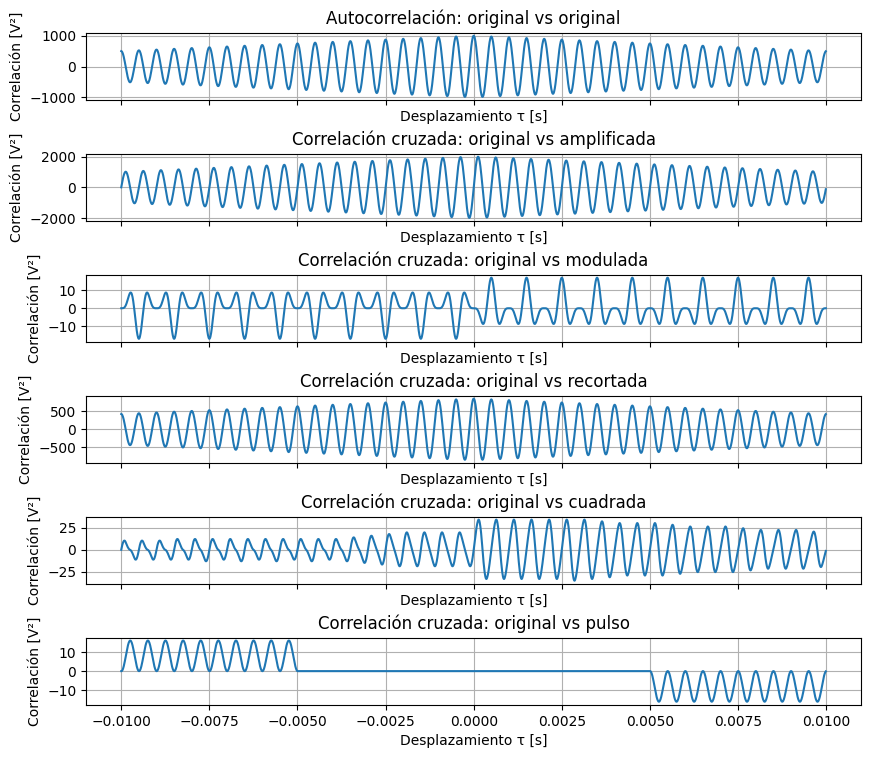

In [30]:
#ITEM 3
rxx=sig.correlate(xx,xx, mode="same") #autocorrelacion de la original
rxa=sig.correlate(xx,aa, mode="same") #correlacion cruzada: original/amplificada
rxmod=sig.correlate(xx,mod, mode="same") #correlacion cruzada: original/modulada
rxrec=sig.correlate(xx,rec, mode="same") #correlacion cruzada: original/recortada
rxcc=sig.correlate(xx,cc, mode="same") #correlacion cruzada: original/cuadrada
rxp=sig.correlate(xx,p, mode="same") #correlacion cruzada: original/pulso

lags = sig.correlation_lags(len(xx), len(xx), mode="same")
lags_s = lags / fs   # en segundos

fig, axs = plt.subplots(6, 1, figsize=(10, 8), sharex=True)

axs = axs.ravel()

axs[0].plot(lags_s, rxx);   axs[0].set_title('Autocorrelación: original vs original')
axs[1].plot(lags_s, rxa);   axs[1].set_title('Correlación cruzada: original vs amplificada')
axs[2].plot(lags_s, rxmod); axs[2].set_title('Correlación cruzada: original vs modulada')
axs[3].plot(lags_s, rxrec); axs[3].set_title('Correlación cruzada: original vs recortada')
axs[4].plot(lags_s, rxcc);  axs[4].set_title('Correlación cruzada: original vs cuadrada')
axs[5].plot(lags_s, rxp);   axs[5].set_title('Correlación cruzada: original vs pulso')

for ax in axs:
    ax.set_xlabel('Desplazamiento τ [s]')
    ax.set_ylabel('Correlación [V²]')
    ax.grid(True)

plt.subplots_adjust(top=0.95, hspace=0.8, wspace=0.8) #ajusta margenes

4) Demostrar la igualdad

$$
2\sin(\alpha)\sin(\beta) = \cos(\alpha - \beta) - \cos(\alpha + \beta)
$$

En primer lugar, presentamos las siguientes fórmulas:

$$
\sin x = \frac{e^{ix} - e^{-ix}}{2i},
\qquad 
\cos x = \frac{e^{ix} + e^{-ix}}{2}
$$

Entonces:

$$
2\sin(\alpha)\sin(\beta) = 2 \cdot \frac{e^{i\alpha} - e^{-i\alpha}}{2i} \cdot \frac{e^{i\beta} - e^{-i\beta}}{2i} = \frac{(e^{i\alpha} - e^{-i\alpha})(e^{i\beta} - e^{-i\beta})}{-2}
$$

Desarrollamos y agrupamos:

$$
= \frac{e^{i(\alpha+\beta)} - e^{i(\alpha-\beta)} - e^{-i(\alpha-\beta)} + e^{-i(\alpha+\beta)}}{-2} = -\frac{e^{i(\alpha+\beta)} - e^{i(\alpha-\beta)} - e^{-i(\alpha-\beta)} + e^{-i(\alpha+\beta)}}{2} = -\frac{(e^{i(\alpha+\beta)} + e^{-i(\alpha+\beta)}) - (e^{i(\alpha-\beta)} + e^{-i(\alpha-\beta)})}{2}
$$

Reconocemos los cosenos y simplificamos:

$$
= -\cos(\alpha+\beta) + \cos(\alpha-\beta)
$$

Por lo tanto:

$$
2\sin(\alpha)\sin(\beta) = \cos(\alpha - \beta) - \cos(\alpha + \beta)
$$


- Verificación con señales sinusoidales (α = ω_a t, β = ω_b t, con ω_a = 2ω_b)

Definiendo: 
$$
\alpha(t)=\omega_a t, \qquad \beta(t)=\omega_b t,
$$
Y considerando las senoidales:  
$$
x_\alpha(t)=\sin(\alpha)=\sin(\omega_a t), \qquad 
x_\beta(t)=\sin(\beta)=\sin(\omega_b t)
$$
Siendo la identidad a verificar:  
$$
2\sin(\alpha)\sin(\beta)=\cos(\alpha-\beta)-\cos(\alpha+\beta)
$$

Reemplazando $\alpha=\omega_a t$ y $\beta=\omega_b t$:  
$$
2\sin(\omega_a t)\sin(\omega_b t)
=\cos\big((\omega_a-\omega_b)t\big)-\cos\big((\omega_a+\omega_b)t\big)
$$

**Caso a demostrar (α tiene el doble de β):** Si $\omega_a=2\,\omega_b$, entonces:  
$$
\begin{aligned}
2\sin(2\omega_b t)\sin(\omega_b t)
&=\cos\big((2\omega_b-\omega_b)t\big)-\cos\big((2\omega_b+\omega_b)t\big) \\
&=\cos(\omega_b t)-\cos(3\omega_b t)
\end{aligned}
$$

**Conclusión.** Para cualquier $\omega_b>0$ (equivalentemente, para cualquier $f_b=\dfrac{\omega_b}{2\pi}$),  
la igualdad trigonométrica **se cumple** entre senoidales donde $\omega_a=2\,\omega_b$:  
$$
\,2\sin(2\omega_b t)\sin(\omega_b t)=\cos(\omega_b t)-\cos(3\omega_b t)\,
$$


### BONUS: análisis de un archivo de audio (.wav)
Se descargó un archivo de audio en formato .wav y se representó gráficamente su forma de onda, luego se calculó su energía total aplicando los mismos criterios de análisis que en los casos anteriores.

Energia total (normalizada): 1220.4691457411916


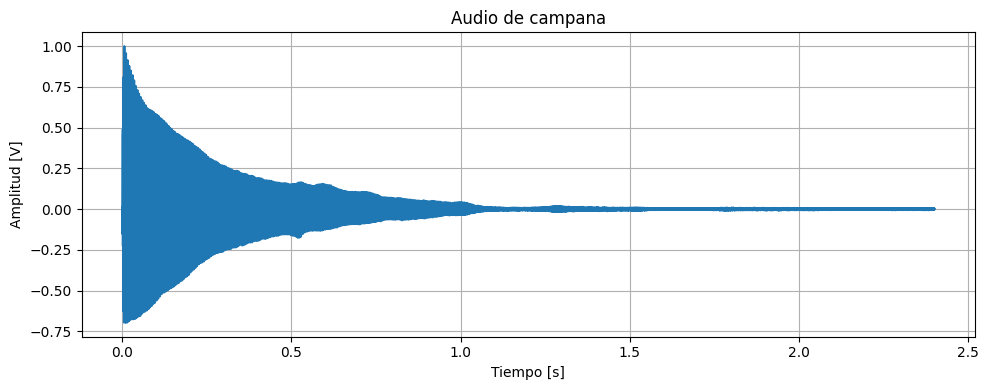

In [32]:
#BONUS
#FS, X = wavfile.read("campana.wav") #cargar el archivo
FS, X = wavfile.read(r"C:\Users\luana\.spyder-py3\TS1\campana.wav.wav")

if X.ndim > 1:          #me soluciona problema con los canales
    X = X.mean(axis=1)

X = X.astype(np.float64) #normalizo por el valor maximo para que no me de un numero tan grande
maxabs = np.max(np.abs(X))
if maxabs > 0:
    X = X / maxabs

NN = X.size
TS = 1/FS
Tw = NN/FS

N = np.arange(NN)
Tiempo = N / FS

energia = np.sum(X**2)
print("Energia total (normalizada):", energia)
plt.figure(figsize=(10,4))
plt.plot(Tiempo, X)
plt.title('Audio de campana')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid(True)

plt.tight_layout(); plt.show()

# Conclusiones

A lo largo del desarrollo de este trabajo se pudo comprobar de manera práctica cómo las operaciones básicas aplicadas sobre señales generan transformaciones claramente observables en su representación temporal y en sus propiedades.

En el primer ítem, la síntesis de la señal original permitió establecer una referencia para el análisis. Al modificar su amplitud y fase, se verificó cómo pequeños cambios en los parámetros iniciales alteran la forma de onda. La modulación en amplitud permitió observar cómo una señal de baja frecuencia puede "transportarse" sobre otra de mayor frecuencia, mientras que el recorte al 75% demostró cómo la no linealidad introduce distorsiones que afectan la energía de la señal. Luego, la construcción de una señal cuadrada permitió contrastar una onda periódica no senoidal con la senoidal original, observando diferencias en forma y contenido espectral. Por último, el pulso rectangular brindó la posibilidad de analizar una señal de duración limitada, lo cual permitió comparar su comportamiento con las señales periódicas.

En el segundo ítem, la comparación de la señal original respecto de las demás nos permitió analizar que en la mayoría de los casos se cumple la ortogonalidad.

La única excepción fue la señal **recortada al 75%**, debido a que el recorte es una operación no lineal que conserva la componente fundamental de 2 kHz, por lo que al compartir esa misma frecuencia, el producto interno no se anula.

Este análisis permitió comprender que la ortogonalidad no depende únicamente de la forma de onda, sino también de la relación entre frecuencias y de la linealidad de las operaciones aplicadas. En este caso, cuando la señal conserva la misma frecuencia fundamental que la original (recorte), la condición de ortogonalidad deja de cumplirse.

En el tercer ítem, las correlaciones cruzadas mostraron el grado de similitud con las demás señales: alta con la versión amplificada y desfazada, menor con la modulada, y aún más baja con la recortada, cuadrada y de pulso.

En particular, respecto a la autocorrelación de la señal original, se observó que esta función siempre alcanza su valor máximo en $n=0$, ya que en ese punto la señal coincide exactamente consigo misma. A medida que aumenta el retardo, la similitud disminuye y aparecen oscilaciones que reflejan la estructura periódica de la señal. Esto confirma que la autocorrelación es una herramienta útil para detectar periodicidades y medir energía de manera indirecta.  

De forma analítica, en tiempo continuo la autocorrelación se define como  

$$
R_{xx}(\tau) = \int_{-\infty}^{\infty} x(t)\,x(t+\tau)\,dt
$$  

donde $\tau$ representa el retardo entre las dos señales. 

Esta expresión permite entender cómo la señal se relaciona consigo misma al desplazarse en el tiempo y muestra de manera clara su periodicidad. 

Al compararlo con los resultados en tiempo discreto obtenidos en Python, se observó que ambos presentan el mismo comportamiento general, aunque en el caso discreto influyen la cantidad de muestras (ventana) y el intervalo de muestreo elegido.

En el cuarto ítem, la demostración de la identidad trigonométrica permitió unir la teoría matemática con la verificación práctica/numérica.

Para finalizar, el **BONUS** logró extender los conceptos a un caso real (análisis de un audio) permitiendo comprobar que los mismos cálculos de energía y representación empleados en señales generadas son aplicables a señales reales. 

A diferencia de las senoidales y las señales construidas anteriormente, el audio presentó una forma de onda compleja y no periódica, que contiene múltiples frecuencias y variaciones de amplitud. 

Al graficar la señal se pudo observar cómo se representa digitalmente un sonido en el tiempo.

Por otro lado, este ejercicio nos permitió marcar una diferencia importante: mientras que en las señales periódicas se calcula normalmente la **potencia promedio** sobre un período, en una señal de audio (no periódica y de duración finita), resulta más adecuado trabajar con **energía total**. 

# Autoevaluación del aprendizaje

Resolví la tarea pero con varias dudas que luego fui aclarando tanto en clase como con la ayuda de ChatGPT. Me resultó interesante porque pude aplicar en la práctica conceptos que al principio me costaban, y terminé entendiendo mejor su funcionamiento al ver los resultados en los gráficos.

Los problemas que tuve a nivel código fueron en la ortogonalidad del ítem 2, porque al principio no me daba cero directamente (era un "casi" cero), por lo que me guié con ChatGPT. También lo utilicé en el BONUS para cargar el archivo de audio, y porque el audio que utilicé tenía dos canales entonces tuve que transformarlo a un solo canal.

Se que me faltaría profundizar en la mejora de los gráficos para que se vean mejor o sean más amigables para el que los ve, lo tengo en una nota mental para futuros trabajos.

Además, necesité apoyo para usar LaTeX dado que algunas expresiones matemáticas no sabía exactamente cómo se representaban.

Por último y a modo chequeo, además de hacer una revisión mía, le pedí que revise mi documento por si había algún error ortográfico.